In [88]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt

# Latex points to inches conversion factor
PTS_PER_INCH = 72.26999
# Latex text width in points
TEXT_WIDTH_PTS = 505.12177
# Latex column width in points
COLUMN_WIDTH_PTS = TEXT_WIDTH_PTS / 2
# Latex column width in inches
COLUMN_WIDTH_INCHES = COLUMN_WIDTH_PTS / PTS_PER_INCH
# Latex text width in inches
TEXT_WIDTH_INCHES = TEXT_WIDTH_PTS / PTS_PER_INCH
# DPI for figures
DPI = 600
# Font scale for figures
FONT_SCALE = 0.5

plt.rcParams['font.stretch'] = 'condensed'
plt.rcParams['font.family'] = 'sans-serif'
matplotlib.rc('xtick', labelsize=8) 
matplotlib.rc('ytick', labelsize=8) 

def plot_signal(ds: xr.Dataset, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.plot(ds['time'], ds['data'])
    ax.set_ylabel(f"{ds.attrs['units']}")
    ax.set_title(f'{ds.label}', fontsize=8)

def standardise_names(ds: xr.Dataset) -> xr.Dataset:
    for name in ['t', 'time1']:
        if name in ds:
            print(ds.attrs['name'])
            ds = ds.rename({name: 'time'})

    return ds

In [4]:
data_path = Path('~/data/tiny').expanduser()
shot_files = list(data_path.glob('*.zarr'))
shot_file = shot_files[4]


defuse_signals = [
    'amc/plasma_current',
    'ayc/te_core',
    'xdc/ip_t_ipref',
    'esm/v_loop_dynamic', 
    'efm/li',
    'efm/magnetic_axis_z', 
    'efm/plasma_area', 
    'esm/surface_area', 
    'efm/minor_radius', 
    'efm/geom_axis_rc', 
    'efm/elongation'
]

datasets = {name:  xr.open_dataset(shot_file, group=name) for name in defuse_signals}
datasets = {name: standardise_names(ds) for name, ds in datasets.items()}

AYC_TE_CORE
/XDC/IP/T/IPREF


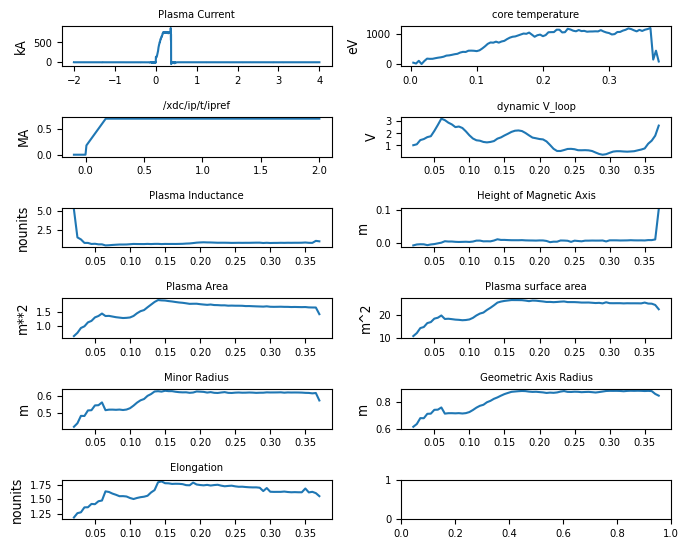

In [9]:
fig, axes = plt.subplots(6, 2, figsize=(TEXT_WIDTH_INCHES, TEXT_WIDTH_INCHES*.8))
for name, ax in zip(defuse_signals, axes.flatten()):
    plot_signal(datasets[name], ax=ax)

plt.tight_layout()

<xarray.DataArray 'time' (time: 73)> Size: 292B
array([0.004166, 0.008332, 0.012498, 0.016664, 0.02083 , 0.024996, 0.029162,
       0.033333, 0.037499, 0.041665, 0.045831, 0.049998, 0.054163, 0.058329,
       0.062495, 0.066667, 0.070833, 0.074998, 0.079165, 0.083331, 0.087496,
       0.091663, 0.095829, 0.1     , 0.104166, 0.108332, 0.112498, 0.116664,
       0.12083 , 0.124996, 0.129162, 0.133333, 0.137499, 0.141665, 0.145831,
       0.149998, 0.154163, 0.158329, 0.162495, 0.166667, 0.170833, 0.174999,
       0.179165, 0.183331, 0.187496, 0.191663, 0.195829, 0.2     , 0.204166,
       0.208332, 0.212498, 0.216664, 0.22083 , 0.224996, 0.229162, 0.233333,
       0.237499, 0.241665, 0.245831, 0.249998, 0.254163, 0.258329, 0.262495,
       0.266667, 0.270833, 0.274998, 0.279165, 0.283331, 0.287496, 0.291663,
       0.295829, 0.3     , 0.304166], dtype=float32)
Coordinates:
  * time     (time) float32 292B 0.004166 0.008332 0.0125 ... 0.2958 0.3 0.3042
Attributes:
    units:    s

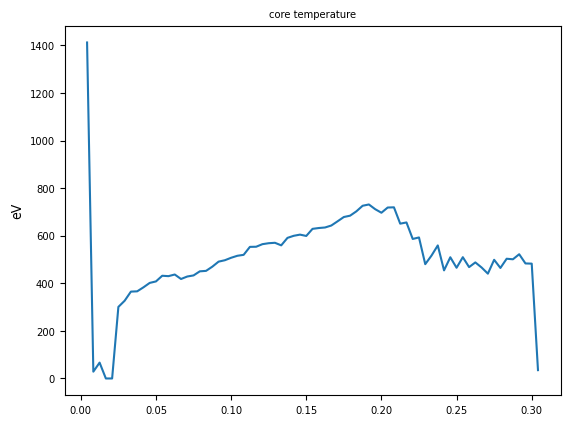

In [10]:
ds = xr.open_dataset('~/data/tiny/30420.zarr', group='ayc/te_core', engine='zarr')
ds = ds.rename(dict(t='time'))
plot_signal(ds)
ds.time

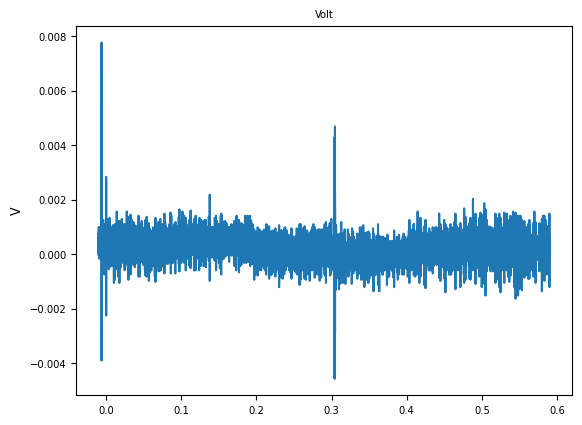

In [16]:
ds = xr.open_dataset('~/data/tiny/30420.zarr', group='xsx/hcam_l_3', engine='zarr')
plot_signal(ds)

## Camera Data

In [16]:
df = pd.read_csv('xsx_camera_t.csv')
df

,name,r1,z1,r2,z2,p_mm,theta_rad,comment
0,XSX TCAM#1,1763.0,1441.0,0.0,0.00,0.0,0.000,Extreme inner channel (central column).
1,XSX TCAM#2,1763.0,1441.0,0.0,86.49,68.6,2.226,NaN
2,XSX TCAM#3,1763.0,1441.0,0.0,171.60,139.3,2.195,NaN
3,XSX TCAM#4,1763.0,1441.0,0.0,256.04,212.5,2.163,NaN
4,XSX TCAM#5,1763.0,1441.0,0.0,339.81,288.2,2.129,NaN
5,XSX TCAM#6,1763.0,1441.0,0.0,422.93,366.3,2.094,NaN
6,XSX TCAM#7,1763.0,1441.0,0.0,505.41,446.4,2.059,NaN
7,XSX TCAM#8,1763.0,1441.0,0.0,587.24,528.5,2.022,NaN
8,XSX TCAM#9,1763.0,1441.0,0.0,668.46,612.3,1.984,NaN
9,XSX TCAM#10,1763.0,1441.0,0.0,760.39,709.4,1.940,NaN


In [17]:
df['r1'].values

array([1763., 1763., 1763., 1763., 1763., 1763., 1763., 1763., 1763.,
       1763., 1763., 1763., 1763., 1763., 1763., 1763., 1763., 1763.])

In [18]:
df['r2'].values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [19]:
df['z1'].values

array([1441., 1441., 1441., 1441., 1441., 1441., 1441., 1441., 1441.,
       1441., 1441., 1441., 1441., 1441., 1441., 1441., 1441., 1441.])

In [20]:
df['z2'].values

array([   0.  ,   86.49,  171.6 ,  256.04,  339.81,  422.93,  505.41,
        587.24,  668.46,  760.39,  840.27,  919.54,  998.21, 1076.28,
       1153.77, 1230.68, 1308.94, 1382.77])

## Plotting LCFS

998877000.0


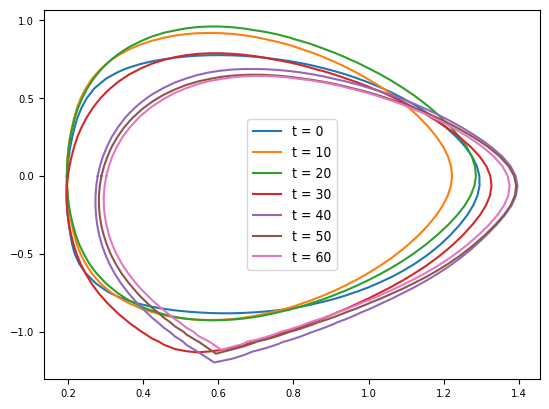

In [89]:
ds_z = xr.open_dataset('~/data/tiny/30390.zarr', group='efm/lcfsz_c', engine='zarr')
ds_r = xr.open_dataset('~/data/tiny/30390.zarr', group='efm/lcfsr_c', engine='zarr')

z = ds_z['data'].values
r = ds_r['data'].values

fill_value = np.max(z)
print(fill_value)

coords = {'r': [], 'z':[]}
for t in range(len(z)):
    coords['r'].append(r[t, r[t] < fill_value])
    coords['z'].append(z[t, z[t] < fill_value])

for t in range(0, len(z), 10):
    plt.plot(coords['r'][t], coords['z'][t], label=f't = {t}')

plt.legend()